# Tutorial 2 SpatialEx+ Enables Larger Panel Spatial Analysis through Panel Diagonal Integration

## Quantitative Analysis

In [4]:
!python panel_diagonal_integration.py --device 6

Namespace(activation='elu', alpha_l=2, attn_drop=0.1, batch_size=4096, beta_l=1, cell_diameter=-1, decoder='linear', deg4feat=False, device=6, drop_edge_rate=0.0, encoder='hgnn', epoch=1000, graph_kind='spatial', h5_path1='/home/wcy/code/datasets/Xenium/Human_Breast_Cancer_Rep1/cell_feature_matrix.h5', h5_path2='/home/wcy/code/datasets/Xenium/Human_Breast_Cancer_Rep2/cell_feature_matrix.h5', hidden_dim=512, image_encoder='uni', img_batch_size=64, img_path1='/home/wcy/code/datasets/Xenium/Human_Breast_Cancer_Rep1/Xenium_FFPE_Human_Breast_Cancer_Rep1_he_image.ome.tif', img_path2='/home/wcy/code/datasets/Xenium/Human_Breast_Cancer_Rep2/Xenium_FFPE_Human_Breast_Cancer_Rep2_he_image.ome.tif', in_drop=0.2, linear_prob=True, load_model=False, logging=False, loss_fn='mse', lr=0.001, negative_slope=0.2, nei_radius=7, norm='batchnorm', num_features=3000, num_heads=4, num_layers=2, num_neighbors=7, num_out_heads=1, obs_path1='/home/wcy/code/datasets/Xenium/Human_Breast_Cancer_Rep1/cells.csv', obs

## Qualitative Analysis

### Visualization of gene expression: *ESR1* on Slice 2, and *PGR* on Slice 1.

load the packages

In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

import preprocess as pp 
selection = pd.read_csv('/home/wcy/code/pyFile/Xenium_modality_impute/inputs/panel/Selection_by_name.csv', index_col=0)
panelA = selection.index[selection['slice1']].tolist()
panelB = selection.index[selection['slice2']].tolist()

show the histology

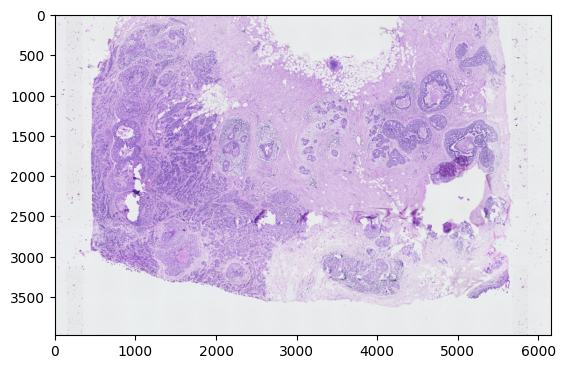

In [43]:
img_path  = '/home/wcy/code/datasets/Xenium/Human_Breast_Cancer_Rep2/Xenium_FFPE_Human_Breast_Cancer_Rep2_he_image.ome.tif'
img, scale = pp.Read_HE_image(img_path)

new_width = img.shape[1] // 5
new_height = img.shape[0] // 5
resized_image = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_AREA)

plt.imshow(resized_image)

In [ ]:
x_prime = np.load('/home/wcy/code/pyFile/Xenium_modality_impute/DeepPT/result/151_500/deeppt_panelA2_wcy_test.npy')
ref = sc.read_h5ad('/home/wcy/code/pyFile/Xenium_modality_impute/inputs/adata/Human_Breast_Cancer_Rep2_resnet50_resolution64_genes2.h5ad')
obs = ref.obs_names

In [46]:
h5_file = '/home/wcy/code/datasets/Xenium/Human_Breast_Cancer_Rep2/cell_feature_matrix.h5'
obs_file = '/home/wcy/code/datasets/Xenium/Human_Breast_Cancer_Rep2/cells.csv'
adata = pp.Read_Xenium(h5_file, obs_file)
adata = pp.Preprocess_adata(adata, cell_mRNA_cutoff=0, selected_genes=panelA)
adata = adata[obs]
adata

/home/wcy/anaconda3/envs/torch2X/lib/python3.8/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [1, 2, 3, 4, 5]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)
/home/wcy/anaconda3/envs/torch2X/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:138: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_counts'] = number
/home/wcy/anaconda3/envs/torch2X/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


View of AnnData object with n_obs × n_vars = 110947 × 150
    obs: 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'log1p'
    obsm: 'spatial'
    layers: 'raw'

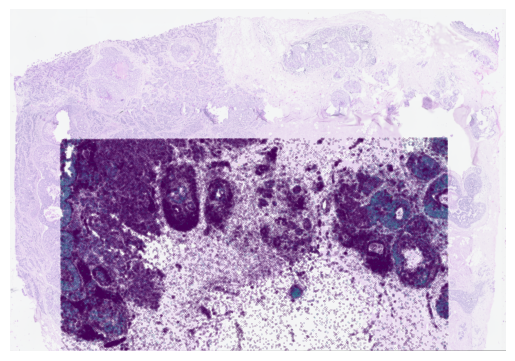

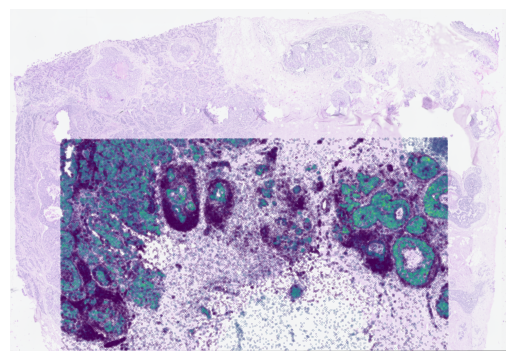

In [48]:
gene_name = 'ESR1'
gene_idx = np.where(adata.var_names == gene_name)[0]

plt.imshow(resized_image, alpha=0.5)
value = adata[:, gene_name].X
x, y = ref.obs['image_col'].values//5, ref.obs['image_row'].values//5
plt.scatter(x, y, c=value, s=0.01)
ax = plt.gca()
ax.set_aspect(1)
plt.ylim((0, 3650))
plt.xlim((400, 5700))
plt.axis('off')
plt.savefig('/home/wcy/code/pyFile/Xenium_modality_impute/version_2/output/adata/150_gene/figs/'+gene_name+'_GT_Rep1.png', 
            dpi=300, bbox_inches='tight')
plt.show()

plt.imshow(resized_image, alpha=0.5)
value = x_prime[:, gene_idx]
value = np.maximum(value, 0)
plt.scatter(x, y, c=value, s=0.01)
ax = plt.gca()
ax.set_aspect(1)
plt.ylim((0, 3650))
plt.xlim((400, 5700))
plt.axis('off')
#plt.colorbar()
# plt.savefig('/home/wcy/code/pyFile/Xenium_modality_impute/version_2/output/adata/150_gene/figs/'+gene_name+'_DeepPT_Rep2.png', 
#             dpi=300, bbox_inches='tight')
plt.show()

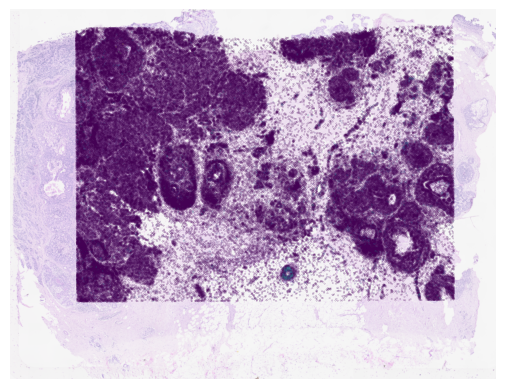

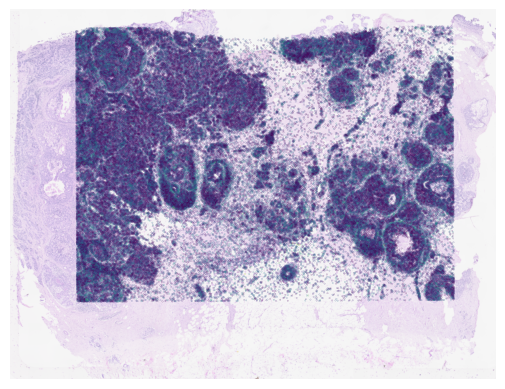

In [42]:
gene_name = 'PGR'
gene_idx = np.where(adata.var_names == gene_name)[0]

plt.imshow(resized_image, alpha=0.5)
value = adata[:, gene_name].X
x, y = ref.obs['image_col'].values//5, ref.obs['image_row'].values//5
plt.scatter(x, y, c=value, s=0.01)
ax = plt.gca()
ax.set_aspect(1)
plt.xlim(475, 5800)
plt.ylim(500, 4550)
plt.axis('off')
plt.savefig('/home/wcy/code/pyFile/Xenium_modality_impute/version_2/output/adata/150_gene/figs/'+gene_name+'_GT_Rep1.png', 
            dpi=300, bbox_inches='tight')
plt.show()

plt.imshow(resized_image, alpha=0.5)
value = x_prime[:, gene_idx]
value = np.maximum(value, 0)
plt.scatter(x, y, c=value, s=0.01)
ax = plt.gca()
ax.set_aspect(1)
plt.xlim(475, 5800)
plt.ylim(500, 4550)
plt.axis('off')
# plt.colorbar()
# plt.savefig('/home/wcy/code/pyFile/Xenium_modality_impute/version_2/output/adata/150_gene/figs/'+gene_name+'_DeepPT_Rep1.png', 
#             dpi=300, bbox_inches='tight')
plt.show()